# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [56]:
if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lab2.lut as lut



Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

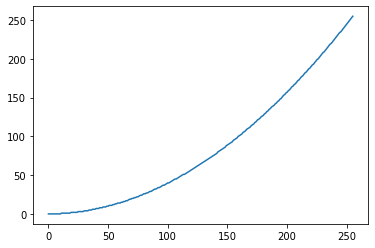

In [57]:
plt.plot(lut.kwadratowa)


Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

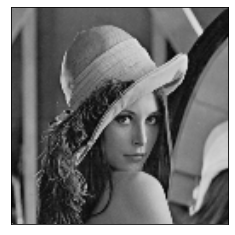

In [58]:
if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

img = cv2.imread("lena.bmp")
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

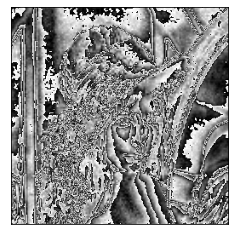

In [59]:
imgLut = cv2.LUT(img, lut.pila)
plt.imshow(imgLut)
plt.xticks([])
plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [60]:
def LUT(image, array):
    changedImage = cv2.LUT(image, array)
    figure, (chart1, chart2, chart3) = plt.subplots(1,3)
    chart1.set_title('Wykres przekodowania')
    chart2.set_title('Obraz oryginalny')
    chart3.set_title('Obraz przeksztalcony')
    chart1.plot(array)
    chart2.imshow(image)
    chart3.imshow(changedImage)
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

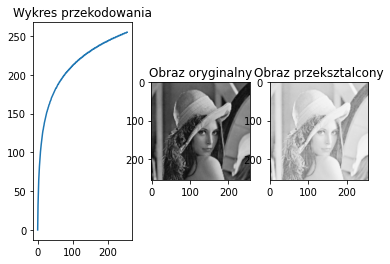

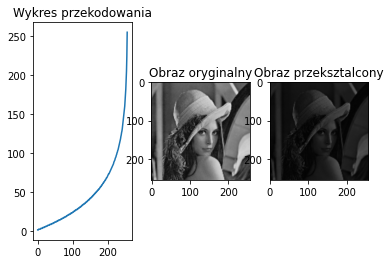

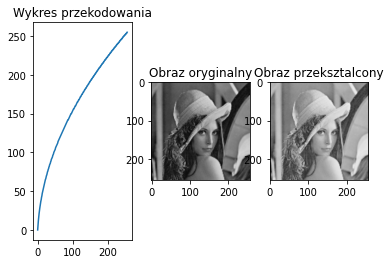

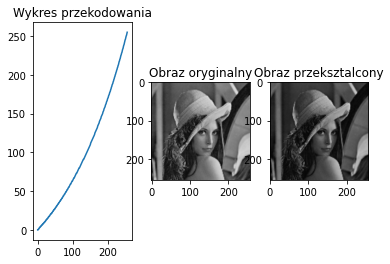

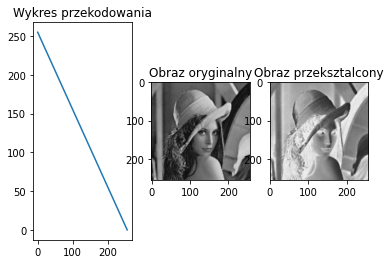

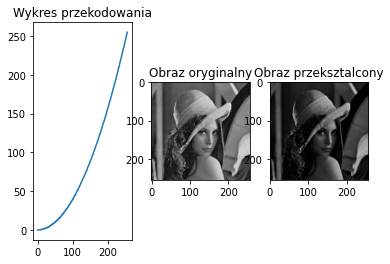

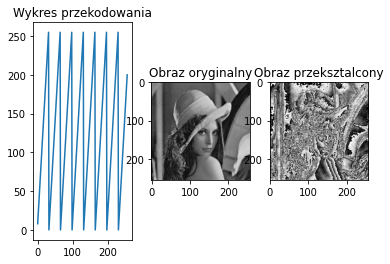

In [61]:
LUT(img, lut.log)
LUT(img, lut.odwlog)
LUT(img, lut.pierwiastkowa)
LUT(img, lut.wykladnicza)
LUT(img, lut.odwrotna)
LUT(img, lut.kwadratowa)
LUT(img, lut.pila)



## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

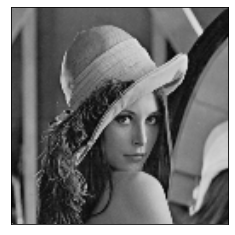

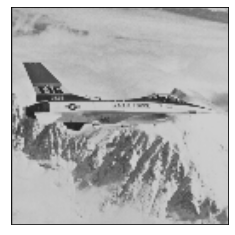

In [62]:
img = cv2.imread("lena.bmp")
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

img2 = cv2.imread("jet.bmp")
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

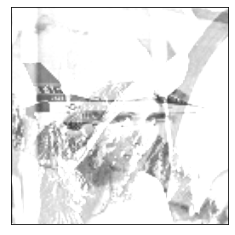

In [63]:
img3 = cv2.add(img, img2)
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

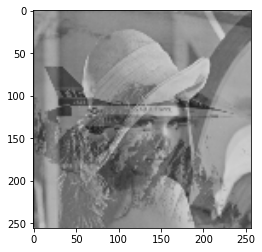

In [64]:
img4 = cv2.add(img.astype('uint16'), img2.astype('uint16'))
plt.imshow((img4 / 2).astype('uint8'))
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

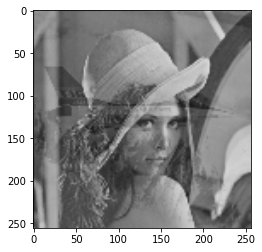

In [65]:
img5 = cv2.addWeighted(img, 0.7, img2, 0.3, 0.03)
plt.imshow(img5)
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

<function matplotlib.pyplot.show(close=None, block=None)>

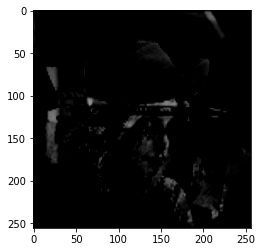

In [66]:
img6 = cv2.subtract(img, img2)
plt.imshow(img6)
plt.show

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

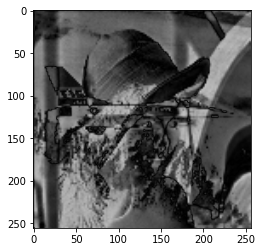

In [67]:
img6 = cv2.subtract(img.astype('int16'), img2.astype('int16'))
plt.imshow(np.abs(img6).astype('uint8'))
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

<function matplotlib.pyplot.show(close=None, block=None)>

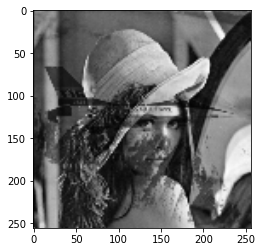

In [68]:
img7F64 = cv2.multiply(img.astype('float64'), img2.astype('float64'))
img7 = (img7F64/img7F64.max() * 255).astype('uint8')
plt.imshow(img7)
plt.show


Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

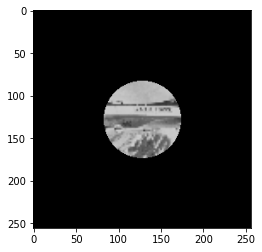

In [69]:
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

mask = cv2.imread("kolo.bmp")
mask = mask.astype('bool').astype('uint8')

img8 = cv2.multiply(img2, mask)
plt.imshow(img8)
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

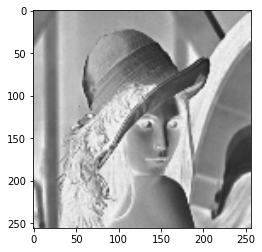

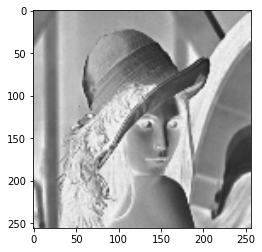

In [70]:
img9 = cv2.LUT(img, lut.odwrotna)
plt.imshow(img9)
plt.show()

img10 = cv2.bitwise_not(img)
plt.imshow(img10)
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

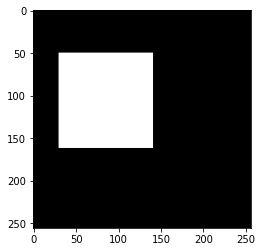

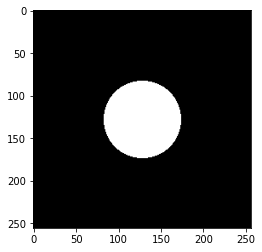

In [71]:
if not os.path.exists('kwadrat.bmp'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
        
        
imgKwadrat = cv2.imread('kwadrat.bmp')
plt.imshow(imgKwadrat)
plt.show()

imgKolo = cv2.imread('kolo.bmp')
plt.imshow(imgKolo)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

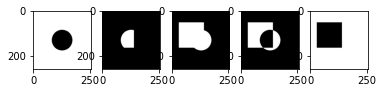

In [74]:
fig, (chart1, chart2, chart3, chart4, chart5) = plt.subplots(1,5)
chart1.imshow(~imgKolo)
chart2.imshow(imgKwadrat & imgKolo)
chart3.imshow(imgKwadrat | imgKolo)
chart4.imshow(imgKwadrat ^ imgKolo)
chart5.imshow(~imgKwadrat)

plt.show()

## Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

<function matplotlib.pyplot.show(close=None, block=None)>

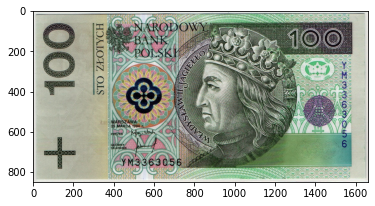

In [78]:
if not os.path.exists('100zloty.jpg'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
        
im_100 = cv2.imread("100zloty.jpg")
plt.imshow(im_100)
plt.show()